<a href="https://colab.research.google.com/github/pennya6/AI_study/blob/main/computervision/Overfitting_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228827136/228813984 [==============================] - 2s 0us/step


In [3]:
batch_size = 32
img_height = 180
img_width = 180

In [4]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [5]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  image_size=(img_height, img_width),
   seed = 1,
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


data augmentation

In [6]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height,  img_width, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1), #이미지 랜덤하게 각도 조절
    layers.experimental.preprocessing.RandomZoom(0.1), 
  ]
)

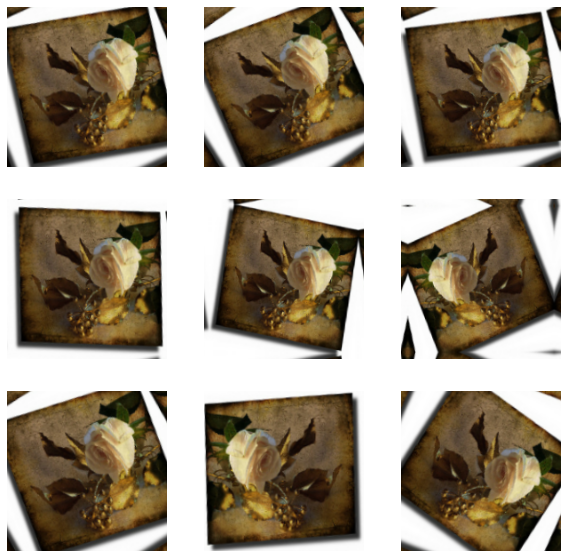

In [7]:
#rotate check
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [8]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [9]:
num_classes = 5

model = Sequential([
  data_augmentation, #agumentation 적용, 객체를 모델에 적용
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)), #이미지 normalize
  layers.Conv2D(16, 3, padding='same', activation='relu'), #활성함수는 batchnormalization한 후에 써야한다. -> 더 딥한 모델 구축시 필수
  layers.BatchNormalization(), #con 다음에 쓰임 , 결과를 normalize 하는 것
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.5), #weight가 줄어드는게 아니라 사용을 안하는것
  layers.Dense(num_classes)
])

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 180, 180, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)       

In [12]:
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
92/92 [==============================] - 157s 2s/step - loss: 2.6545 - accuracy: 0.3011 - val_loss: 1.5392 - val_accuracy: 0.2725
Epoch 2/20
92/92 [==============================] - 145s 2s/step - loss: 1.3960 - accuracy: 0.3801 - val_loss: 1.4448 - val_accuracy: 0.3610
Epoch 3/20
92/92 [==============================] - 137s 1s/step - loss: 1.3518 - accuracy: 0.4138 - val_loss: 1.3873 - val_accuracy: 0.4632
Epoch 4/20
92/92 [==============================] - 136s 1s/step - loss: 1.2933 - accuracy: 0.4200 - val_loss: 1.5079 - val_accuracy: 0.3215
Epoch 5/20
92/92 [==============================] - 136s 1s/step - loss: 1.2997 - accuracy: 0.4261 - val_loss: 1.2020 - val_accuracy: 0.5313
Epoch 6/20
92/92 [==============================] - 135s 1s/step - loss: 1.2413 - accuracy: 0.4370 - val_loss: 1.0881 - val_accuracy: 0.5872
Epoch 7/20
92/92 [==============================] - 135s 1s/step - loss: 1.2173 - accuracy: 0.4768 - val_loss: 1.1233 - val_accuracy: 0.5354
Epoch 8/20
92

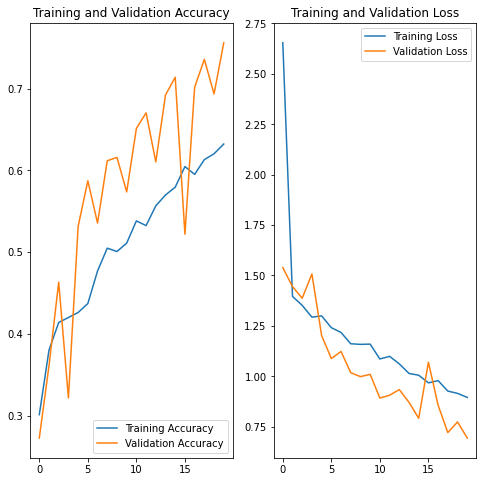

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()